# Perceptron Assignment

In [64]:
# importing
import numpy as np

# Perceptron API

In [65]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = [] # used only for reporting
        
        # calculate and print the number of initial errors
        initial_errors = 0
        for xi, target in zip(X, y):
            if self.predict(xi) != target:
                initial_errors += 1
        print("initial errors: ", initial_errors)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi))
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors)
        return self
    
    # The dot product (np.dot) of two 1d arrays is what you get 
    # from multiplying corresponding values and adding up the results.

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, 0)

# Reading the data

In [66]:
import pandas as pd

s = 'data.csv'
print('Data file:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
    
df.tail()

Data file: data.csv


,0,1,2
95,0.77029,0.70140,0
96,0.73156,0.71782,0
97,0.44556,0.67991,0
98,0.85275,0.85987,0
99,0.51912,0.62359,0


# Plotting the data

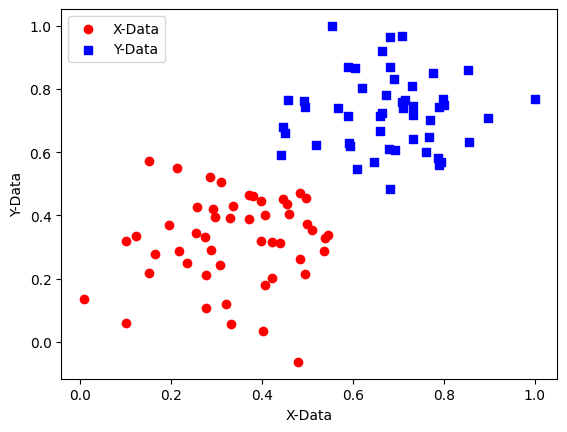

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt


# Setting x and y
X = df.iloc[0:100, [0, 1]].values  # get index 0 and 1 values from entry [0 to 100]
y = df.iloc[0:100, 1].values  # get index 1 value from entry [0 to 100]


# Plot data
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='X-Data')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Y-Data')


# Plot label
plt.xlabel('X-Data')
plt.ylabel('Y-Data')
plt.legend(loc='upper left')

plt.show()

# Training the perceptron model

initial errors:  100
xi:  [ 0.48051  -0.063669] Target:  -0.063669 Prediction:  0
xi:  [0.28774 0.29139] Target:  0.29139 Prediction:  0
xi:  [0.40714 0.17878] Target:  0.17878 Prediction:  1
xi:  [0.2923 0.4217] Target:  0.4217 Prediction:  0
xi:  [0.50922 0.35256] Target:  0.35256 Prediction:  0
xi:  [0.27785 0.10802] Target:  0.10802 Prediction:  1
xi:  [0.27527 0.33223] Target:  0.33223 Prediction:  0
xi:  [0.43999 0.31245] Target:  0.31245 Prediction:  0
xi:  [0.33557 0.42984] Target:  0.42984 Prediction:  1
xi:  [0.23448 0.24986] Target:  0.24986 Prediction:  0
xi:  [0.0084492 0.13658  ] Target:  0.13658 Prediction:  0
xi:  [0.12419 0.33595] Target:  0.33595 Prediction:  0
xi:  [0.25644 0.42624] Target:  0.42624 Prediction:  1
xi:  [0.4591  0.40426] Target:  0.40426 Prediction:  0
xi:  [0.44547 0.45117] Target:  0.45117 Prediction:  0
xi:  [0.42218 0.20118] Target:  0.20118 Prediction:  1
xi:  [0.49563 0.21445] Target:  0.21445 Prediction:  0
xi:  [0.30848 0.24306] Target:  0.243

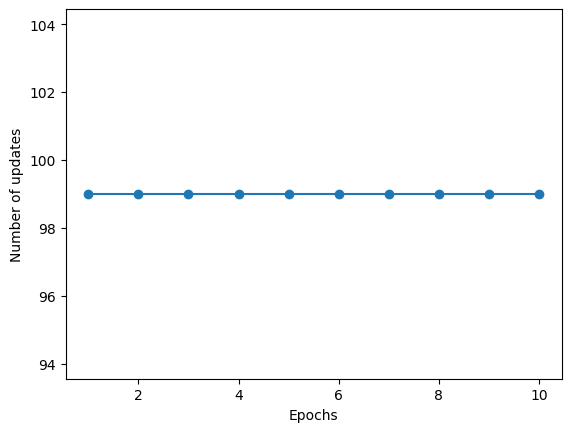

In [68]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=121)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

# Plotting decision regions

In [69]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Plotting the decision region for the trained data

IndexError: tuple index out of range

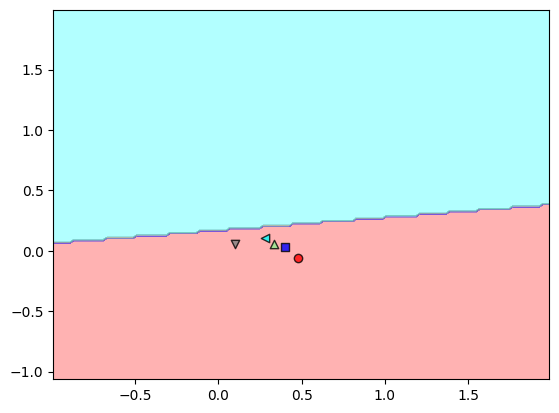

In [70]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('X-Data')
plt.ylabel('Y-Data')
plt.legend(loc='upper left')

plt.show()

# Conclusion

- There is a significant error while training on the provided data set.
- As you can see from the plot, there is no way to distinguish two features because they are scattered and overlapping. 
- As a result, the model was unable to classify them.